**Otimizar os produtos que serão alocados em uma mochila de modo a maximizar o valor total armazenado, 
respeitando o limite de espaço da mochila. **

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max	avg   
0  	50    	805	595.86
1  	50    	860	704.66
2  	48    	867	750.42
3  	46    	905	793.74
4  	48    	945	826.8 
5  	46    	955	858.18
6  	42    	1000	897.02
7  	44    	1002	916   
8  	46    	1030	952.2 
9  	45    	1030	974.14
10 	50    	1030	985.88
11 	48    	1030	998.9 
12 	45    	1030	1003.7
13 	47    	1030	1023.3
14 	45    	1030	1018.9
15 	46    	1030	1021.6
16 	47    	1030	1022.1
17 	48    	1030	1026.7
18 	46    	1030	1020  
19 	43    	1030	1018.34
20 	46    	1030	1024.9 
21 	46    	1030	1016.9 
22 	45    	1030	1022.8 
23 	46    	1030	1027.7 
24 	44    	1030	1021.1 
25 	49    	1030	1025.7 
26 	44    	1030	1015.6 
27 	42    	1030	1017.1 
28 	44    	1030	1017.1 
29 	43    	1030	1023.24
30 	50    	1030	1025.6 
31 	46    	1030	1025.5 
32 	48    	1030	1027.5 
33 	46    	1030	1030   
34 	47    	1030	1018.74
35 	47    	1030	1023.2 
36 	36    	1030	1024.1 
37 	48    	1030	1016.1 
38 	45    	1030	1022.6 
39 	42    	1030	1018.7 
40 	47    	1030	1022.94
41 	46    	1030	102

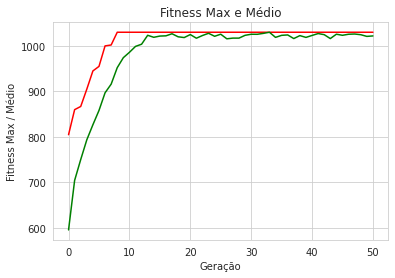

In [45]:

!pip install deap
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

class Knapsack01Problem: 
  def __init__(self):
    self.items=[]
    self.maxCapacity = 0
    # produto, peso, valor
    self.items = [
        ("map", 9, 150),
        ("compass", 13, 35),
        ("water", 153, 200),
        ("sandwich", 50, 160),
        ("glucose", 15, 60),    
        ("tin", 68, 45),
        ("banana", 27, 60),
        ("apple", 39, 40),
        ("cheese", 23, 30),
        ("beer", 52, 10),
        ("suntan cream", 11, 70),
        ("camera", 32, 30),
        ("t-shirt", 24, 15),
        ("trousers", 48, 10),
        ("umbrella", 73, 40),
        ("waterproof trousers", 42, 70),
        ("waterproof overclothes", 43, 75),
        ("note-case", 22, 80),
        ("sunglasses", 7, 20),
        ("towel", 18, 12),
        ("socks", 4, 50),
        ("book", 30, 10)        
    ]    
    self.maxCapacity = 400
  def __len__(self):
    return len(self.items)

  def getValue(self, zeroOneList):
    totalWeight = totalValue = 0
    for i in range(len(zeroOneList)):
      item, weight, value = self.items[i]
      if totalWeight + weight <= self.maxCapacity: 
        totalWeight += zeroOneList[i] * weight
        totalValue += zeroOneList[i] * value
    return totalValue
    
  def printItems(self, zeroOneList):
    totalWeight = totalValue = 0

    for i in range(len(zeroOneList)):
        item, weight, value = self.items[i]
        if totalWeight + weight <= self.maxCapacity:
            if zeroOneList[i] > 0:
                totalWeight += weight
                totalValue += value
                print("+ Item {}: peso = {}, valor = {}, peso acumulado = {}, valor acumulado = {}".format(item, weight, value, totalWeight, totalValue))
    print("- Peso total = {}, Valor total = {}".format(totalWeight, totalValue))  

knapsack = Knapsack01Problem()
POPULATION_SIZE = 50
P_CROSSOVER = 0.9
P_MUTATION = 0.1
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 1

random.seed(42)
toolbox= base.Toolbox()
#cria um operador que randomicamente retorna 0 ou 1
toolbox.register("zeroOrOne", random.randint, 0, 1)
#define o objetivo da estratégia 
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
#cria a classe Individual 
creator.create("Individual", list, fitness=creator.FitnessMax)
#cria um operador individual para preencher a instancia Individual
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(knapsack))
#cria um operador de população para gerar uma list de individuals
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

#função de fitness
def knapsackValue(individual): 
  return knapsack.getValue(individual), #retorna uma tupla
toolbox.register("evaluate", knapsackValue)

#parâmetros dos operadores genéticos
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(knapsack))

def main(): 

  #cria população inicial (geração 0)
  population = toolbox.populationCreator(n=POPULATION_SIZE)
  # prepara as estatísticas
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  stats.register("max", np.max)
  stats.register("avg", np.mean)

  hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

  population, logbook = algorithms.eaSimple(population, toolbox, cxpb = P_CROSSOVER, mutpb = P_MUTATION, 
                                            ngen=MAX_GENERATIONS, stats = stats, halloffame = hof, verbose = True)

  #estatísicas extras 
  maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

  print ("\n--------------- RESULTADOS ---------------\n")
  fitness_max_geral = 0;
  geracao_max_geral = 0;
  for i in range(len(maxFitnessValues)):
    if maxFitnessValues[i] > fitness_max_geral :
      fitness_max_geral = maxFitnessValues[i]
      geracao_max_geral = i
  print("--- Melhor geração: %s" %geracao_max_geral)

  #imprime a melhor solução encontrada
  best = hof.items[0]
  print("--- Melhor Indivíduo = ", best)
  print("--- Melhor fitness =", best.fitness.values[0])
  print("--- Melhor combinação de itens: ")

  knapsack.printItems(best)

  #plot estatísticas
  sns.set_style("whitegrid")
  plt.plot(maxFitnessValues, color='red')
  plt.plot(meanFitnessValues, color = 'green')
  plt.xlabel('Geração')
  plt.ylabel('Fitness Max / Médio')
  plt.title('Fitness Max e Médio')
  plt.show()

if __name__ == "__main__":
    main()